# Basic Data Science in Python
Data Source: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

Additional Information: https://www.dataquest.io/blog/machine-learning-preparing-data/

Seaborn Graphs for Categorical Data: http://seaborn.pydata.org/tutorial/categorical.html

Load libraries and make graphs show inline with the code.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

Read data into dataframe and show first 5 rows.

In [2]:
df = pd.read_csv(r"C:\Users\AllenM\Desktop\Coding\Data Science\Basic Tutorial - Vidhya\Train.csv")
df.head(5)

#print(df.columns.tolist()) # prints list of column names
#df = df.dropna(thresh=len(df)/2, axis=1) # drops any column with >50% null values

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Initial descriptive analysis of full data set.

'Describe' gives information on the datasets central tendency, dispersion and shape of distribution.

In [3]:
#df = df.rename(columns={"LoanAmount":"Loan Amount"}) # rename cols if desired

#df.shape() # shows us the rows and columns we're dealing with
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The standard deviation for ApplicantIncome is quite high, suggesting lots of variables being far away from the mean and a dispersed data set, the max is also very high enhancing the chance of outliers. The count of LoanAmount, LoanAmountTerm and CreditHistory is less than the sample size, therefore some of these values must be nulls.

We can also investigate the categorical variables not covered in the above describe table.

In [4]:
df['Education'].value_counts()
df['Property_Area'].value_counts()
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

This shows us that there are far more graduates than non-graduates and males than females in the sample. Also, semi-urban > urban > rural ranging from ~230 down to ~180 with fairly even gaps between.

Now to investigate some variables more in depth.

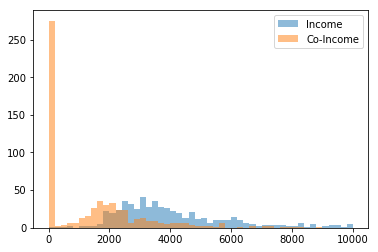

In [5]:
# alpha controls transparency, range sets max x limit
plt.hist(df["ApplicantIncome"], bins=50, alpha=0.5, label="Income", range=(0,10000))
plt.hist(df["CoapplicantIncome"], bins=50, alpha=0.5, label="Co-Income", range=(0,10000))
plt.legend(loc="upper right")
plt.show()

Here, applicant income and coapplicant income have been plotted on the same histogram. It looks like both contain outliers (I have cropped the x-axis to limit the effect of these on the graph) which are positively skewing the data, also coapplicant income tends to be lower than applicant income.

You can also clearly see that the majority of coapplicants have an income of 0, which is throwing off the y axis. We don't want to treat these 0 values as missing data because it is very likely that most respondents are applying individually and without a partner, we certainly can't assume that all respondents who have 0 co-applicant loan amounts have simply neglected to include that information.

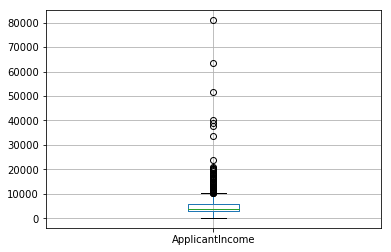

In [6]:
df.boxplot(column='ApplicantIncome')

You can see that the ApplicantIncome variable is concentrated towards the lower end of the scale, with progressively sparse values towards the higher end, indicating outliers. Let's cross this variable with some other to understand possible causes for these extreme values.

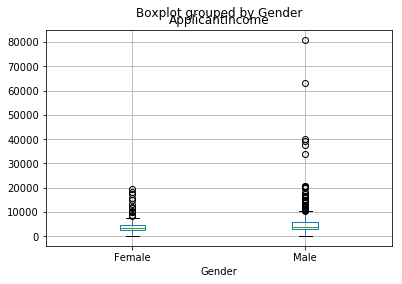

In [7]:
df.boxplot(column='ApplicantIncome', by='Gender')

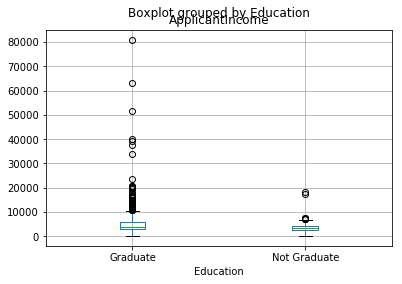

In [8]:
df.boxplot(column='ApplicantIncome', by='Education')

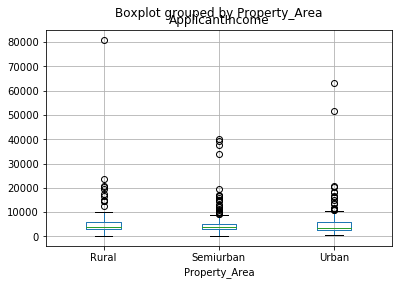

In [9]:
df.boxplot(column='ApplicantIncome', by='Property_Area')

This tells us that the outliers are coming entirely from the male population and mostly from the graduate sample, whilst Property_Area has little obvious effect. Often, social factors are responsible for creating extreme values and this appears to be the case here, you would expect better educated people to earn more on average and potentially for a gender bias to feed more males in high paid jobs.

Let's have a look at another variable, LoanAmount.

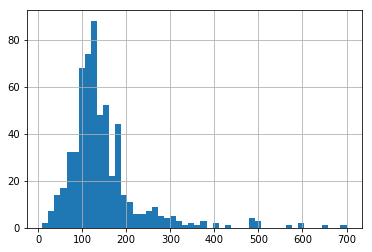

In [10]:
df['LoanAmount'].hist(bins=50)

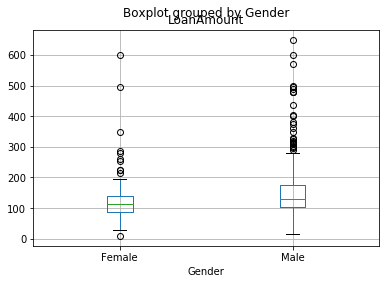

In [11]:
df.boxplot(column='LoanAmount', by='Gender')

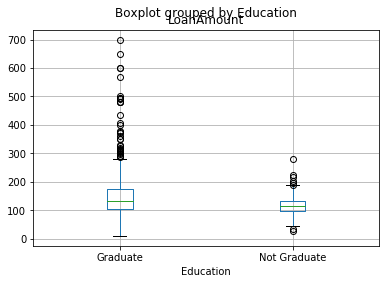

In [12]:
df.boxplot(column='LoanAmount', by='Education')

In [13]:
sns.pointplot(x="ApplicantIncome", y="LoanAmount", hue="Gender", data=df)

NameError: name 'sns' is not defined

Not necessarily the best graph to use here, but you can see that on average as the ApplicantIncome increases, the LoanAmount increases a little as well, with greater fluctuations in this trend towards the top income ranges. You would expect a higher frequency of loans from lower income individuals perhaps, but also the higher earning people may be more confident in repaying loans over time and be able to afford to take the risk of higher loans on average.

Both ApplicantIncome and LoanAmount have some extreme values and non-normal distributions, as such some data wrangling/munging will be required later to make these variables suitable to specific methods of statistical modelling and testing.

Let us first look at some other potentially insightful relationships, for example, how does credit history affect your loan status.

Before carrying out analysis, let's replace null/missing/NaN values with the mean of each column.

In [14]:
df.fillna(df.mean())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [15]:
temp1 = df["Credit_History"].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status", index=["Credit_History"], aggfunc=lambda x: x.map({"Y":1, "N":0}).mean())

print("Credit History Frequency Table:")
print(temp1)

print("Probability of getting a loan for each credit history status:")
print(temp2)

Credit History Frequency Table:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting a loan for each credit history status:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


This creates an Excel style pivot table showing us the probability of getting a loan for people with and without credit histories. You can see that you are far more likely to get a loan if you have a credit history.

We can plot this data to get a visual idea of it.

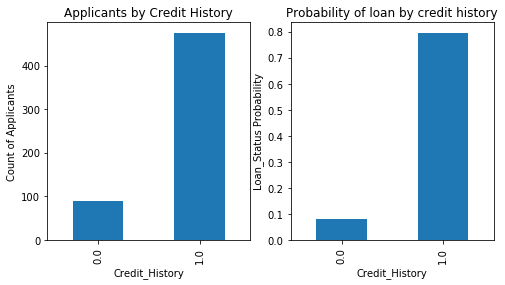

In [16]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit History")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Loan_Status Probability")
ax2.set_title("Probability of loan by credit history")
temp2.plot(kind="bar")

You can clearly see that the chance of getting a loan is ~8-fold for people with a credit history. We can also view this data in a stacked bar chart after first combining the data into a cross-tab and then plotting it.

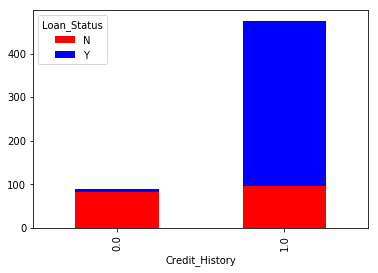

In [17]:
temp3 = pd.crosstab(df["Credit_History"], df["Loan_Status"])
temp3.plot(kind="bar", stacked=True, color=["red", "blue"], grid=False)

You can combine multiple variables into the graph if you prefer.

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


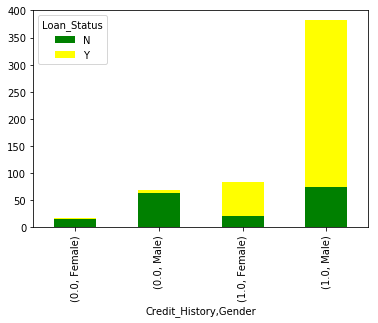

In [18]:
temp4 = pd.crosstab([df["Credit_History"], df["Gender"]], df["Loan_Status"])
temp4.plot(kind="bar", stacked=True, color=["green", "yellow"], grid=False)
print(temp4)

This graph reinforces the positive correlation between loan status and credit history, it also shows that the amount of people with a loan is far higher than those without and that there are far more male applicants than female.

# Data Munging
Our data contains missing values which need to be imputed (estimated and filled in) based on the amount of missing values and the importance of the variable they affect. It also contains a mix of numerical and categorical variables which we know to contain outliers as well as some interesting distribution, so these will need further investigation before we decide how to deal with them (transform distributions etc.).

First, we will handle the missing values. Missing values can prevent models from running at all in some cases, if the frequency is high enough it can simply result in poor model creation otherwise. You also have to consider what constitutes a missing value, obviously the lack of any information (i.e. NaN) is a missing value, but if a value is 0 for a certain variable type then this could be considered a missing value too.

In [19]:
df.apply(func=lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This shows us that, despite there not being a huge amount of nulls overall, they are spread across most of our variables therefore imputing data to them is necessary.

We will use a simplistic method to simply replace NaN values with the mean from the column they comprise.

In [20]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


This is a simple and innacurate method of filling missing values, the best method would be to run a predictive model such as a supervised learning module where you learn from other variables (features) to predict the individual output variable (label).

A middle solution would be to look at a few variables in the dataset which may show links to our output variable we are trying to predict, we will do this in the following example. We will look at whether the combination of education and self-employment are linked to the loan amount an individual takes out.

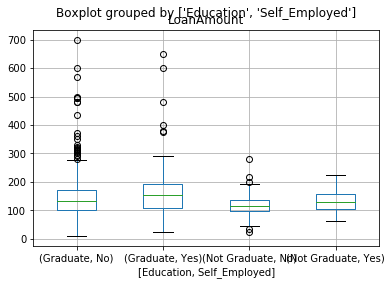

In [21]:
df.boxplot(column="LoanAmount", by=["Education", "Self_Employed"])

We know that self-employed and loan amount have missing values present, we have imputed values for the loan amount but we must deal with the self-employed variable too. Let's investigate the self-employed variable to figure out how to approach the imputation.

In [22]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

It's clear that "No" is the most common answer by far at around 80% of the values, we can therefore conduct a simple imputation of "No" for all missing values in this field.

In [23]:
df["Self_Employed"].fillna("No", inplace=True)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


If we want to fill the loan amount variable in with something more accurate than simply the mean of loan amount we can create a pivot table which shows the loan amount mean for individuals who fall into different categories of self employed and education combinations.

This way, we are selecting a more representative mean value to use by first segmenting the respondents based on multiple related variables.

In [24]:
#NOTE: this will only work if you haven't already replaced the NaN LoanAmount values with methods above.

# creates table of median loan amounts for each self employed and education combination
table = df.pivot_table(values="LoanAmount", index="Self_Employed", columns="Education", aggfunc=np.median)

# function to extract loan amount median based on self employed and education value
def fage(x):
    return table.loc[x["Self_Employed"], x["Education"]]

# inplace makes changes straight to dataframe (no assignment required)
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

df.head(10)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

## Handling extreme values
Extreme values skew a distribution due to their extreme value, whether incredibly high or low. A way to visualise this more effectively is to plot a variable containing extreme variables on a logarithmic scale where the scale is condensed exponentially in order to view massive values on a smaller physical graph.

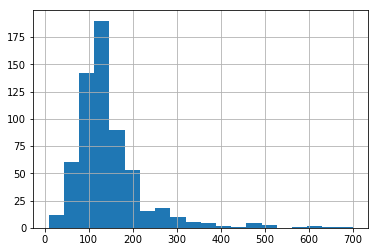

In [25]:
df["LoanAmount"].hist(bins=20)

You can see that in the standard scale graph above, the high extreme values alter the distribution to make it look positively skewed. However, the below graph (using a log scale) shows a truer reflection of the data distribution by decreasing the factor of the outliers.

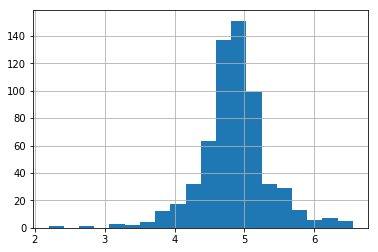

In [26]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)

Now we can look at another variable, applicant income. It is possible that individuals with a low individual income may have a high support income, therefore combining the two will reflect a more accurate picture of that person's financial status.

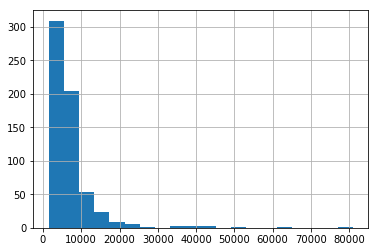

In [27]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome"].hist(bins=20)

Again, we can see that there are many extreme values which are skewing our data, we will correct this with another log scale.

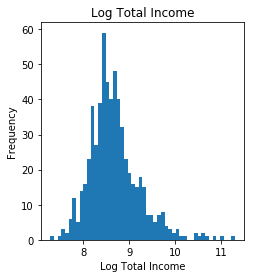

In [28]:
df["TotalIncome_log"] = np.log(df["TotalIncome"])

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Log Total Income")
ax1.set_ylabel("Frequency")
ax1.set_title("Log Total Income")
df["TotalIncome_log"].plot(kind="hist", bins=50)


## Additional personal analysis
The above analysis has covered a few core variables, there are many others in the database. I will now work through some of these to impute missing values, examine individual variable distributions and investigate a few basic relationships between variables which are likely to be highly linked or give an insight into respondents beyond a single distribution.

The first example we can look at is loan amount / total income, this could give us an indication of how likely someone is going to be able to pay off their loan.

[]

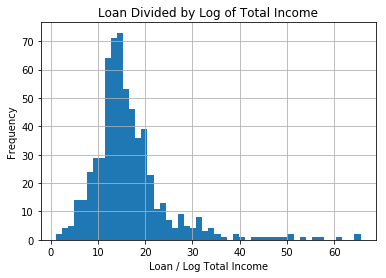

In [29]:
df["LoanByIncome"] = df["LoanAmount"] / df["TotalIncome_log"]
a = df["LoanByIncome"].hist(bins=50)
a.set_title("Loan Divided by Log of Total Income")
a.set_xlabel("Loan / Log Total Income")
a.set_ylabel("Frequency")
a.plot()

More work needed here to understand exactly what is going on and why this analysis is useful, at present it isn't clear what is being shown.

I will write the post-processed CSV out so that I can begin doing the predictive analysis using this file, rather than the df in memory.

In [30]:
df.to_csv("post_processed_csv.csv")